In [1]:
!pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in c:\programdata\anaconda3\lib\site-packages (0.1.54)


In [2]:
from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [3]:
import nltk
from wordcloud import WordCloud, STOPWORDS

In [4]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

## yahoo 사이트의 finance 카테고리를 연결해서  
## 주식 데이터를 얻을 수 있는 라이브러리

In [5]:
import yfinance as yf
from pandas_datareader import data  # 데이터를 사이트에서 바로 받아올 수 있는 기능의 라이브러리

yahoo finance에 연결하기 위한 초기화 작업

In [6]:
yf.pdr_override()

In [14]:
start_date = '1990-1-1'
end_date = '2020-07-30'

In [15]:
kakao = data.get_data_yahoo('035720.KS', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [20]:
kakao.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-02-11,273000.0,273000.0,273000.0,273000.0,258278.734375,55300
2000-02-14,264000.0,298000.0,240500.0,247000.0,233680.750000,1254100
2000-02-15,250000.0,259000.0,217500.0,217500.0,205771.531250,648600
2000-02-16,210000.0,243500.0,200000.0,243500.0,230369.500000,871400
2000-02-17,246000.0,267500.0,235000.0,243500.0,230369.500000,1019800


<AxesSubplot:xlabel='Date'>

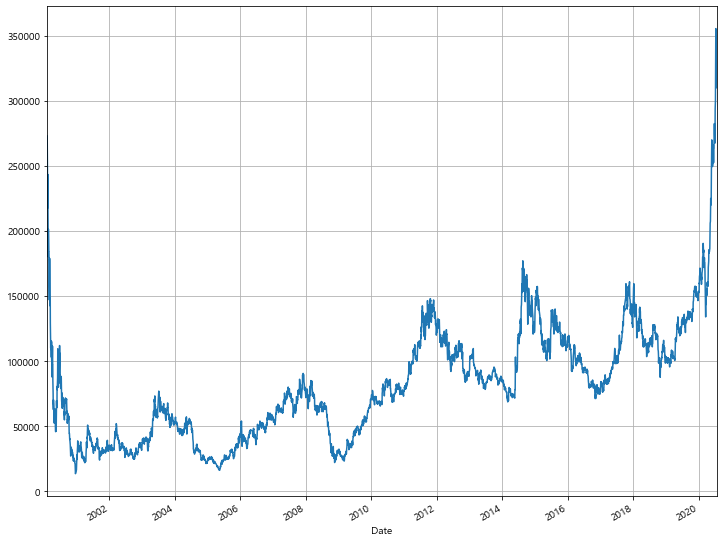

In [19]:
kakao['Close'].plot(figsize=(12,10), grid=True)

In [22]:
naver = data.get_data_yahoo('035420.KS', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [26]:
naver.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-10-29,1797.719971,1797.719971,1797.719971,1797.719971,1695.220947,501745
2002-10-30,2012.229980,2012.229980,1989.750000,2012.229980,1897.500488,20892185
2002-10-31,2042.869995,2091.899902,1865.140015,1912.130005,1803.108032,32327083
2002-11-01,1961.150024,2022.439941,1724.180054,1793.640015,1691.373535,18373668
2002-11-04,1777.300049,1789.550049,1660.849976,1703.750000,1606.608643,16939411


<AxesSubplot:xlabel='Date'>

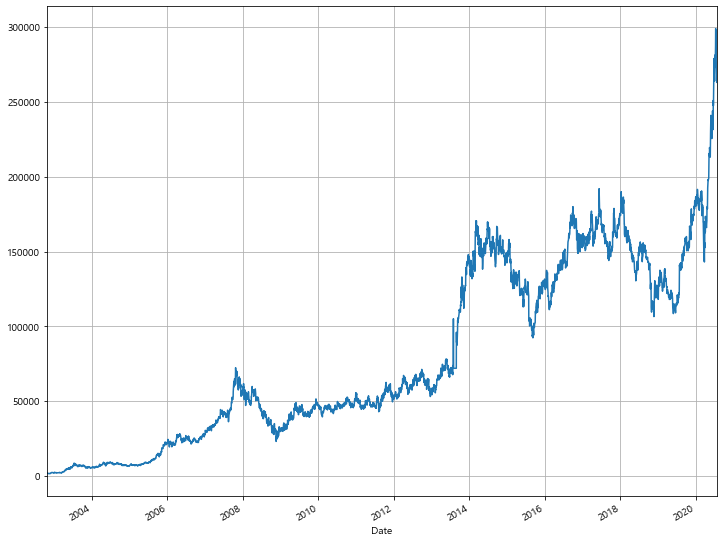

In [23]:
naver['Close'].plot(figsize=(12,10), grid=True)

### facebook의 예측모델을 사용하기 위한 2가지 조건
- 날짜가 들어간 열 이름을 ds로 예측값이 들어간 열 이름을 y로 기본 설정되어 맞춰준다.
- 데이터 프레임으로 만들어 주어야 한다.

## 1. KAKAO

In [66]:
df = pd.DataFrame({
    'ds' : kakao.index,
    'y' : kakao['Close']
})

In [67]:
df.reset_index(inplace=True)

In [68]:
del df['Date']

In [69]:
df

,ds,y
0,2000-02-11,273000.0
1,2000-02-14,247000.0
2,2000-02-15,217500.0
3,2000-02-16,243500.0
4,2000-02-17,243500.0
...,...,...
5022,2020-07-15,337500.0
5023,2020-07-16,322000.0
5024,2020-07-17,325000.0
5025,2020-07-20,310000.0


In [70]:
m = Prophet(daily_seasonality=True)

In [71]:
m.fit(df)

In [72]:
future =m.make_future_dataframe(periods=365)

In [73]:
forecast = m.predict(future)

In [74]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2000-02-11,127401.311579,102847.075854,151256.589577
1,2000-02-14,127064.968575,103264.174675,149706.665517
2,2000-02-15,127055.432907,105913.495928,151066.620093
3,2000-02-16,126896.312293,103932.352158,148581.580589
4,2000-02-17,126714.626585,103564.602122,149646.003940
...,...,...,...,...
5387,2021-07-17,223938.970284,192884.313996,255300.832709
5388,2021-07-18,223598.203377,190634.744597,256649.442687
5389,2021-07-19,204226.477363,171617.506804,234399.646800
5390,2021-07-20,203922.694047,169767.822191,236497.283633


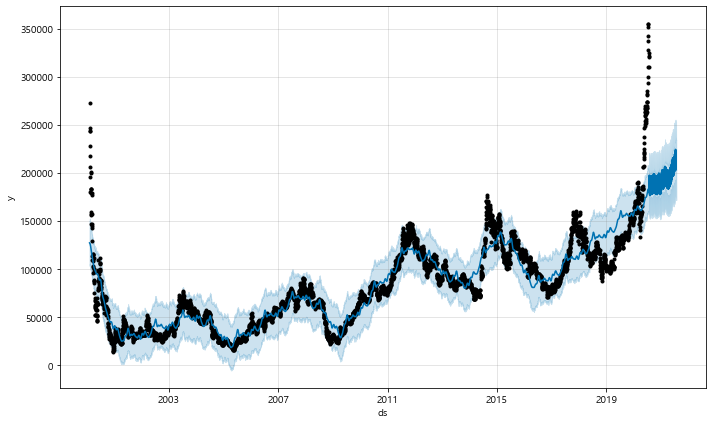

In [46]:
m.plot(forecast);

## 2. NAVER

In [47]:
df2 = pd.DataFrame({
    'ds' : naver.index,
    'y' : naver['Close']
})

In [48]:
df2.reset_index(inplace=True)
del df2['Date']

In [49]:
m = Prophet(daily_seasonality=True)
m.fit(df2)

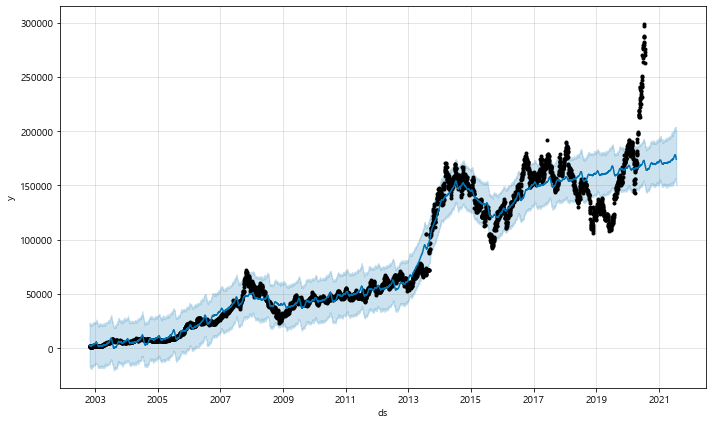

In [50]:
future =m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]
m.plot(forecast);

## 3. AMAZON

In [51]:
amazon = data.get_data_yahoo('AMZN', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

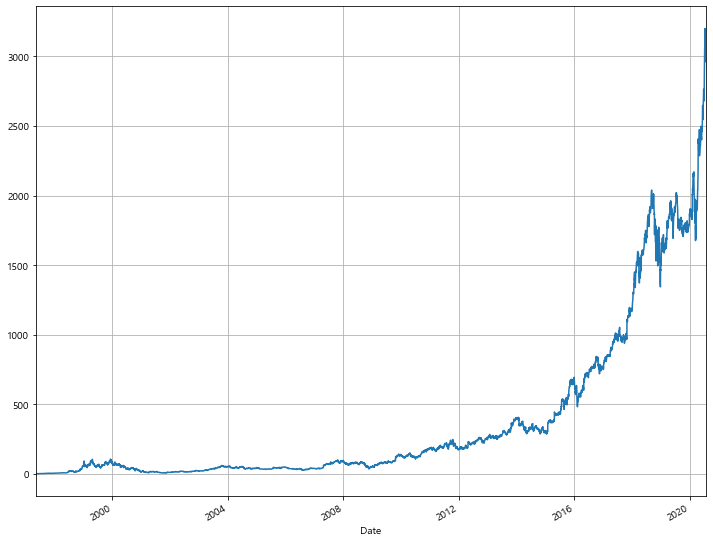

In [52]:
amazon['Close'].plot(figsize=(12,10), grid=True)

In [53]:
df3 = pd.DataFrame({
    'ds' : amazon.index,
    'y' : amazon['Close']
})

In [54]:
df3.reset_index(inplace=True)
del df3['Date']

In [56]:
m = Prophet(daily_seasonality=True)
m.fit(df3)

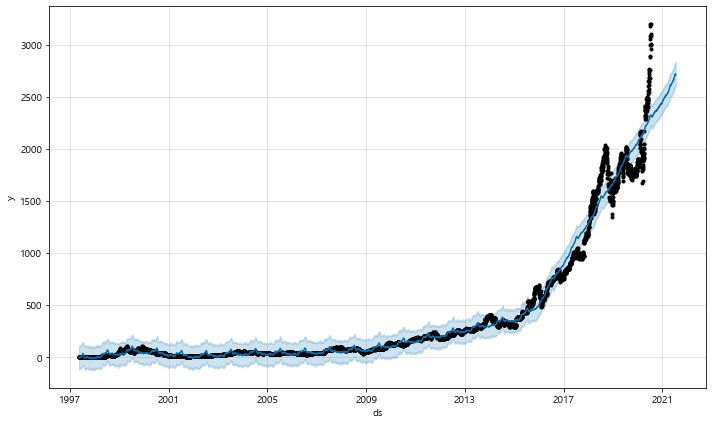

In [57]:
future =m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]
m.plot(forecast);

## 4. MS

In [58]:
ms = data.get_data_yahoo('MSFT', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

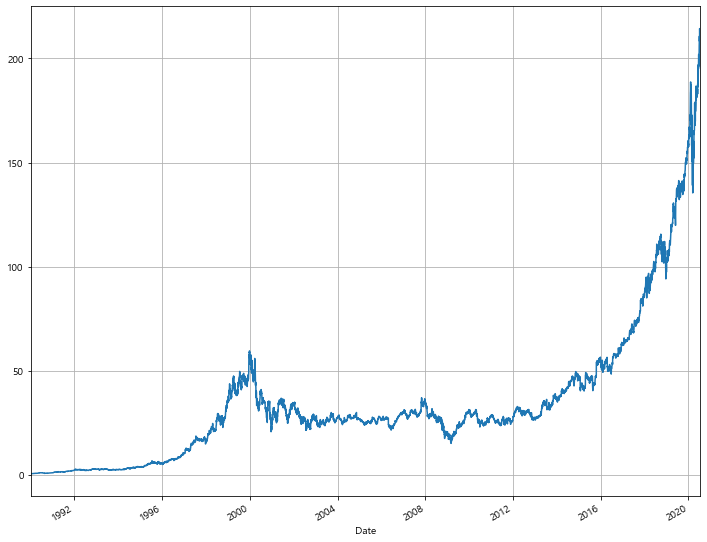

In [59]:
ms['Close'].plot(figsize=(12,10), grid=True)

In [60]:
df4 = pd.DataFrame({
    'ds' : ms.index,
    'y' : ms['Close']
})
df4.reset_index(inplace=True)
del df4['Date']

In [61]:
m = Prophet(daily_seasonality=True)
m.fit(df4)

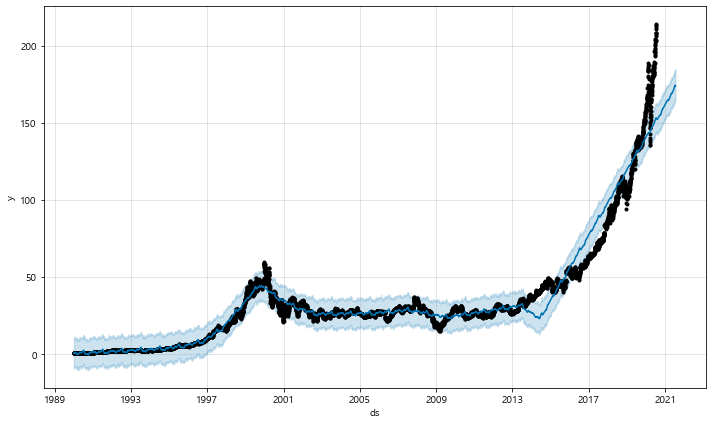

In [62]:
future =m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]
m.plot(forecast);

## 2020을 제외한 MS 예측

In [63]:
start_date = '1990-1-1'
end_date = '2019-12-31'

In [64]:
ms = data.get_data_yahoo('MSFT', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


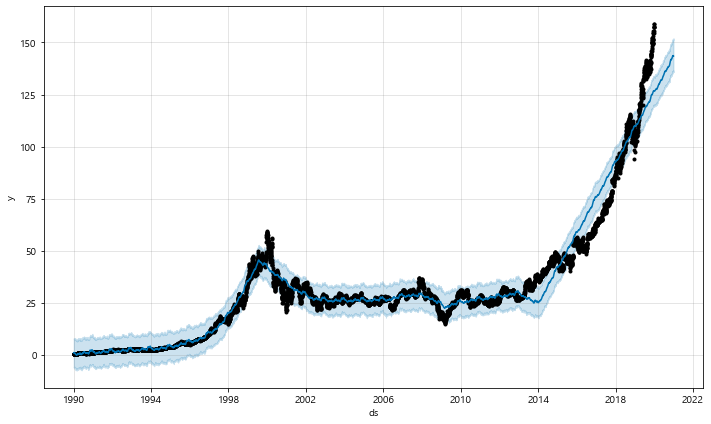

In [65]:
df4_1 = pd.DataFrame({
    'ds' : ms.index,
    'y' : ms['Close']
})
df4_1.reset_index(inplace=True)
del df4_1['Date']
m = Prophet(daily_seasonality=True)
m.fit(df4_1)
future =m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]
m.plot(forecast);

## 다시 kakao

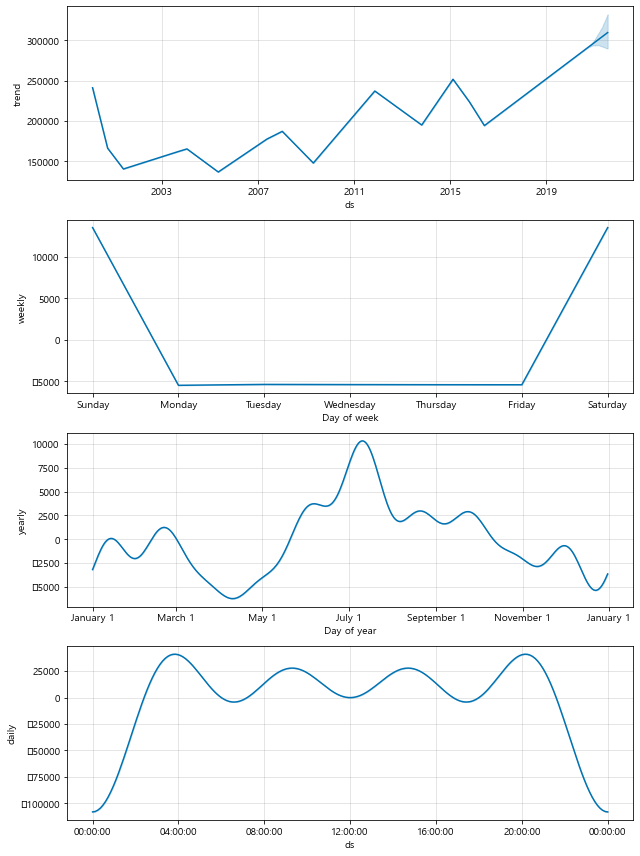

In [75]:
m.plot_components(forecast);